<a href="https://colab.research.google.com/github/aws3ma/data-wrangling/blob/main/Data_wrangling_seance3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) importation de la bibliothèque pandas

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
dw_folder='/content/drive/MyDrive/DataWrangling/'

Mounted at /content/drive


2) Charger le fichier "country.csv" et afficher le dataframe 

In [2]:
df = pd.read_csv(dw_folder+"/country.csv")

3) Vérifier l'existence de valeurs nulls dans le dataframe

In [3]:
df.isna().sum()

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

4)
* Renommer les colonnes (pop, lifeExp, gdpPercap) par (Population, Age, PIB)
* Afficher le dataframe

In [16]:
df.rename(columns={"pop":"Population","lifeExp":"Age","gdpPercap":"PIB"},inplace=True)

5) Afficher le nombre de pays pour chaque continent

In [17]:
df.groupby("continent").country.nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

6) Pour chaque contient, vérifier l'existence de valeurs abbérantes pour la variable Age

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


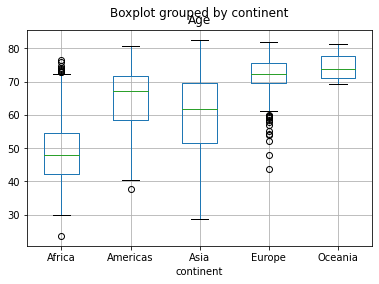

In [21]:
df.boxplot(column="Age" ,by="continent")

7) Pour le contient Africa, afficher le dataframe (df1) contenant les pays dont la variable Age est une valeur abbérante.  

In [31]:
df1 = df[df.continent=='Africa']
def calculs(dataframe):
  q1 = dataframe.quantile(q=0.25)
  q2 = dataframe.quantile(q=0.5)
  q3 = dataframe.quantile(q=0.75)
  irq = q3 - q1
  lower_limit = q1 - irq * 1.5
  upper_limit = q3 + irq * 1.5  
  return q1,q2,q3,lower_limit,upper_limit
q1,q2,q3,lower_limit,upper_limit = calculs(df1.Age)
df1[(df1.Age<= lower_limit) | (df1.Age >=upper_limit)]

,country,year,Population,continent,Age,PIB
910,Libya,2002,5368585.0,Africa,72.737,9534.677467
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1268,Reunion,1992,622191.0,Africa,73.615,6101.255823
1269,Reunion,1997,684810.0,Africa,74.772,6071.941411
1270,Reunion,2002,743981.0,Africa,75.744,6316.165200
1271,Reunion,2007,798094.0,Africa,76.442,7670.122558
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
1570,Tunisia,2002,9770575.0,Africa,73.042,5722.895655
1571,Tunisia,2007,10276158.0,Africa,73.923,7092.923025


8) Pour l'année 2007, vérifier pour chaque continent l'existence de valeurs abbérantes pour la variable PIB.

In [32]:
df.head()

,country,year,Population,continent,Age,PIB
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


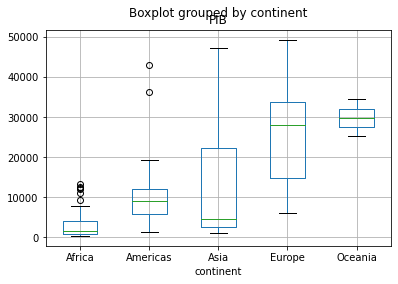

In [35]:
# df2 = df[df.year==2007]

df[df.year==2007].boxplot(column="PIB",by="continent")

9) Afficher dans une nouvelle dataframe (df2), les pays du continent Africa ayant la variable PIB comme valeur abbérante en 2007

In [38]:
df2=df[(df.year==2007) & (df.continent=='Africa')]
q1,q2,q3,lower_limit,upper_limit=calculs(df2.PIB)
df2[(df1.PIB<= lower_limit) | (df1.PIB >=upper_limit)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,Population,continent,Age,PIB
167,Botswana,2007,1639131.0,Africa,50.728,12569.851770
491,Equatorial Guinea,2007,551201.0,Africa,51.579,12154.089750
551,Gabon,2007,1454867.0,Africa,56.735,13206.484520
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1415,South Africa,2007,43997828.0,Africa,49.339,9269.657808


10) 
* Dans une nouvelle DataFrame, garder seulement les colonnes ('continent', 'year', 'Population') et les années 1952 et 2007
* Afficher la population totale de chaque continent pour les années 1952 et 2007

In [72]:
# df3=df.iloc[:,1:4]
# df3=df3[(df3.year==1952) | (df3.year==2007)]
df3=df[(df.year==1952)| (df.year==2007)].iloc[:,1:4]

# df3=df3.groupby(["continent","year"]).Population.sum()

10) Afficher sous forme de barres verticales (histogrammes) la population totale de chaque continent pour les année 1952 et 2007

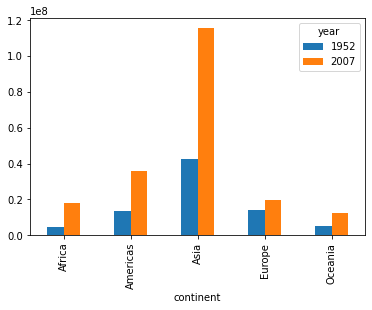

In [73]:
df5=df3.pivot_table(index="continent",columns="year",values="Population")
df5.plot.bar()

11) Afficher pour chaque continent, le pays qui la plus grande valeur de PIB en 2007

In [95]:
df6=df[df.year==2007]
df7 = df6.groupby(["continent"])["PIB"].max()
df.merge(df7)

,country,year,Population,continent,Age,PIB
0,Australia,2007,20434176.0,Oceania,81.235,34435.36744
1,Gabon,2007,1454867.0,Africa,56.735,13206.48452
2,Kuwait,2007,2505559.0,Asia,77.588,47306.98978
3,Norway,2007,4627926.0,Europe,80.196,49357.19017
4,United States,2007,301139947.0,Americas,78.242,42951.65309
